In [8]:
from neuralprophet import NeuralProphet

In [12]:
from read_data_no_index import read_data
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
HPG=read_data('D:\HPG.csv')

In [20]:
HPG=HPG[(HPG['Date'] >= '2018-01-01') & (HPG['Date'] <= '2024-06-21')]
HPG=HPG[['Date','Close']]

In [22]:
HPG.columns=['ds','y']

# Train the Model

In [24]:
model = NeuralProphet()
model.fit(HPG)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: |                                                                                      | 0/? [00:00<…

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (51) is too small than the required number                     for the learning rate finder (230). The results might not be optimal.


Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - D:\Anaconda\Lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - D:\Anaconda\Lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 7. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |                                                                                      | 0/? [00:00<…

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,1.168945,0.0,51694.437500,58426.738281,1.165244,0.0,0
1,0.705242,0.0,33535.062500,39611.964844,0.703083,0.0,1
2,0.314811,0.0,17721.285156,21650.554688,0.312671,0.0,2
3,0.130482,0.0,9688.380859,11195.510742,0.129633,0.0,3
4,0.103777,0.0,8407.569336,9766.362305,0.103469,0.0,4
...,...,...,...,...,...,...,...
95,0.004253,0.0,1304.697510,1688.405151,0.004258,0.0,95
96,0.004225,0.0,1308.045776,1702.435913,0.004278,0.0,96
97,0.004229,0.0,1296.954956,1693.974243,0.004238,0.0,97
98,0.004233,0.0,1305.507080,1695.706055,0.004269,0.0,98


# Evaluate the Model

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: |                                                                                    | 0/? [00:00<…

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: |                                                                                    | 0/? [00:00<…

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


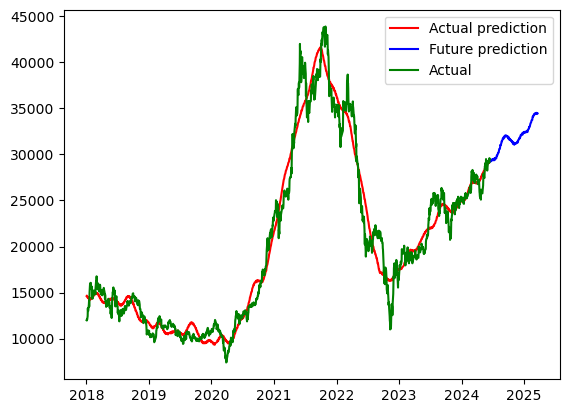

In [26]:
future = model.make_future_dataframe(HPG,periods=200)
forecast = model.predict(future)
actual_prediction=model.predict(HPG)
plt.plot(actual_prediction['ds'],actual_prediction['yhat1'],label='Actual prediction',c='r')
plt.plot(forecast['ds'],forecast['yhat1'],label='Future prediction',c='b')
plt.plot(HPG['ds'],HPG['y'],label='Actual',c='g')
plt.legend()
plt.show()